# Physics 411 Term Project: 3-Body Simulation

#### By Zac Cross

### Goal: Simulate and Plot 3 Body Gravitational Motion

### Introduction:

This python note book is walkthrough of the 3 Body Gravitational problem, with numerical solutions and plotting. Below you will find a short explantation of the 3 body problem and how it differs from the usual 2-Body problem, as well as why it is of interest in physics. After that you will find the code, starting with imports and home-made classes, and then onto the functions, and finally with a 2 body simulation and then the 3 body one. You'll see below that I decided to model this problem using scipy's odeint function to numerically solve for the equations of motion. I initially tried to use a more reimann sum type approach, applying forces over small increments of time and updating the motion and positions, but this proved to be too tedious and easy to mess up. After being stuck on this for a few weeks, I started researching other approaches to the problem. The most common solution was to use python functions to numerically solve for the trajectories, straight from Newton's laws and then plotting those solutions. In this project I will be using scipy's odeint to solve the equations, which simplifies the code and reduces the chances for human error. It's important to note that my code heavily relies on the examples I found online, but with some of my own twists to improve the code and to make the whole simulation more user friendly. Consequently, the last chunk of text is a list of citations for the works and documentation I've consulted in producing this project. 



### Background: A little context before the code...
The 2 Body gravitational physics problem is the standard $F = G \times m_1 \times m_2 \div r^2$, that we're all used to from introductory physics. In our mechanics class this term, we expanded on this, looking at the full 3D 2 body problem. We then solved for the equations of motion using the Langragian formalism and looked at the solutions as functions of r and $\phi$. All of this, though tedious and difficult at times, could be done in a fairly straight forward manner, and we could apply those solutions to problems with orbits and satellites and do interesting things with them. 

However, as soon as we introduce a third body, things start to get wonky. In the general case, the 3rd body adds another term into the equations of motion, and that is enough to break all of the problem solving techniques we've used this term and we start to observe chaotic motion with non-analytic solutions. Special cases do exist such as when 1 or 2 masses dominate the 3rd, and we approximately get back to the 2 body regime or we get special symmetries to reduce the dimension of the problem, but in general these problems are very hard if not impossible to solve by hand. 

This is where the computers come in handy. Even though these problems can't be done by hand, we can use python to numerically 'solve' our equations of motion and observe what happens when we adjust parameters like the mass, position, and velocity of the bodies involved.

### Code:

Here is the bulk of my project. Before we get too far in, it's important to say exactly what will be done below. I will go through the classes and helper functions I made as the infrastructure of the simulation. None of it is very necessary to crank through this code, but I think it makes more sense to non-coders and non-physicists alike to make these objects to reduce the abstractness of the code. As you can find in my citations, the sources I based this project off of do not have very readable code, and that made it really hard to try and figure out what each part is doing, making it hard to learn anything without staring at th code for a few hours. 

Past the helper parts, there is a 2 body equation and then simulation. These functions are a test of the methods I am using to make sure we get sensible results before moving onto the chaotic 3 body case. I think this is nice to check my own code, but also to give users something they are more familiar with that they can reference if they are confused about the rest of the code. 

Finally, I make the necessary adjustments for the 3 body equation and simulation. This is a simple plot of the trajectories, as well as the trajectories themselves, if the user decides to do something interesting with them. 

Lastly, probably one of the most important things to mention is that all of my work defaults to a scale where Newton's gravitational constant is 1. I did this for simplicity of defaulting values to 1 and to make it easier to scale my plots to something nice looking in my examples. I added options for users to mess with scaling, as well as to introduce any value of G that they want, so feel free to do so. It took some time for me to set initial conditions to get cool looking plots so best of luck!

#### Useful Imports:

We'll use scipy's odeint to numerically solve for the equations of motion and use matplot lib to plot everything. Numpy will serve as the infrastructure, with numpy arrays, linspace, etc.


In [10]:
# Imports:
import numpy as np  # For arrays and linspace
import scipy as s # For Any scipy functions I've forgotten
from scipy.integrate import odeint  # The Most useful equation solver I've found.
import matplotlib.pyplot as plt # Plotting library
import math  # I don't actually know why FLAG TO REVISE
from mpl_toolkits.mplot3d import Axes3D # Allows 3D Plotting
import matplotlib.animation as animation #Attempt to animate my plots


#### Classes:
This is where my code really differs from the sources I used to get things to work. Building class objects here is not really neccessary, especially since odeint like numpy arrays. However, I think it makes the code much easier on the user's end, and will make it easier for my overall simulation.

##### Vector Class
The vector class is everything we need in physics for a 3D vector in a non-rotating frame. It will serve as the basic infrastructure for the simulation. It has xyz components and a magnitude element. For niceness with the odeint function, I also had it return a numpy array list implementation. I also added in a few basic math operations like +, - , x, div.   

In [2]:
class vector:
    """Define a vector class to make math operations and locations easier"""
    
    def __init__(self, x, y ,z):
        self.x = x
        self.y = y
        self.z = z
        self.r = math.sqrt((self.x**2) + (self.y**2) + (self.z**2))
        self.l = np.array([self.x, self.y, self.z])
    
    def __repr__(self):
        return f"Vector({self.x}, {self.y}, {self.z})"
        
    def __str__(self):    
        return f"Vector({self.x}, {self.y}, {self.z})"
        
    def __sub__(self, other):
        return vector(self.x - other.x, self.y - other.y, self.z - other.z)
    
    def __add__(self, other):
        return vector(self.x + other.x, self.y + other.y, self.z + other.z)
    
    def times(self, c):
        return vector(c*self.x, c*self.y, c*self.z)
    def div(self, c):
        return vector(self.x/c, self.y/c, self.z/c)
    
example_vector = vector(1,2,3)
v1 = vector(1,1,1)
print("An example of vector stuff:")
print(f"Self: {example_vector}\n")
print(f"Addittion and subtraction:")
print(f"Vector(1,1,1) + Vector(1,2,3) = {v1 + example_vector}")
print(f"Vector(1,1,1) - Vector(1,2,3) = {v1 - example_vector}")

print(f"\nMultiplication and Division:")
print(f"Vector(1,1,1) * 4 = {v1.times(4)}")
print(f"Vector(1,1,1) / 4 = {v1.div(4)}")

An example of vector stuff:
Self: Vector(1, 2, 3)

Addittion and subtraction:
Vector(1,1,1) + Vector(1,2,3) = Vector(2, 3, 4)
Vector(1,1,1) - Vector(1,2,3) = Vector(0, -1, -2)

Multiplication and Division:
Vector(1,1,1) * 4 = Vector(4, 4, 4)
Vector(1,1,1) / 4 = Vector(0.25, 0.25, 0.25)


##### The Body Class:

This is the class of the actual planets themselves. It has mass, and initial position and velocity vectors to give some initial conditions. I think this extra layer of code is useful to make setting up a simulation easier.

I wanted to add a little pizaz so the Body Class has a name parameter, so the user can assign a string to the body and keep track of it that way. The _body, class is the Body classs without the naming. Since I introduced the name later on in the simulation, it was easier to have an internal _body class_ and an external one, than to make one suitable to both fucntions.

In [3]:
class Body:
    def __init__(self, name: str, mass: float, r, v, a = vector(0,0,0)):
        self.m = mass
        self.r = r
        self.v = v
        self.a = a
        self.n = name
        
    def __repr__(self):
        return f"Body({slef.n}, {self.m}kg, {self.r.l}, {self.v.l}, {self.a.l})"
        
    def __str__(self):    
        return f"Body({self.n},{self.m}kg, {self.r.l}, {self.v.l}, {self.a.l})"
    
class _body:
    def __init__(self, mass: float, r, v, a = vector(0,0,0)):
        self.m = mass
        self.r = r
        self.v = v
        self.a = a
        
        
    def __repr__(self):
        return f"Body({slef.n}, {self.m}kg, {self.r.l}, {self.v.l}, {self.a.l})"
        
    def __str__(self):    
        return f"Body({self.n},{self.m}kg, {self.r.l}, {self.v.l}, {self.a.l})"
    
Jupyter = Body("brian",200e19, vector(0,0,0), vector(2,3,4) )
print(Jupyter)
    

Body(brian,2e+21kg, [0 0 0], [2 3 4], [0 0 0])


### Functions:

##### 2 Body-Gravity:
Here's a function to calculate the force between 2 bodies. This will be useful later in in the simulation. Returns a vector with components to be used in the odeint equation solver.

In [4]:
"""Equation of motion: r''(t) = -GM/r^2, x''(t) = -GM x(t)/r^3"""

def grav(body_1, body_2, G=1, K1=1, K2=1):
    r = body_1.r - body_2.r
    r_vec = r.l
    rv = s.linalg.norm(r_vec)
    force = r.times(G*round((-body_1.m * body_2.m) / (rv)**3,3))
    return force


##### 2 Body Equation Function:
This function is what we use with odeint to solve. In it, we set up the dr/dt and dv/dt equations in each direction. 


In [5]:
def eqn_2(i, t, m1, m2, G=1,  K1=1, K2=1):
    
    r1 =  vector(i[0], i[1], i[2]) # Establish vectors from input
    r2 = vector(i[3], i[4], i[5])
    v1 = vector(i[6], i[7], i[8])
    v2 = vector(i[9], i[10], i[11])

    
    bod1 = _body(m1, r1, v1) #make bodies
    bod2 = _body(m2, r2, v2)
    
    bod1.a = grav(bod1, bod2, G).div(bod1.m) #use grav function a = F/m
    bod2.a = grav(bod2, bod1, G).div(bod2.m)
     
    r_ders = [bod1.v.x, bod1.v.y, bod1.v.z, bod2.v.x, bod2.v.y, bod2.v.z] # get derivatives in each cartesian direction
    v_ders = [bod1.a.x, bod1.a.y, bod1.a.z, bod2.a.x, bod2.a.y, bod2.a.z]
    r = [K2*i for i in r_ders]
    v = [K1*i for i in v_ders]
    return  r+ v




### 2 Body Simulation:
Here's the full implementation into the 2 body problem. The user can supply the bodies, and the time frame they want to simluate, as well as a G to scale.

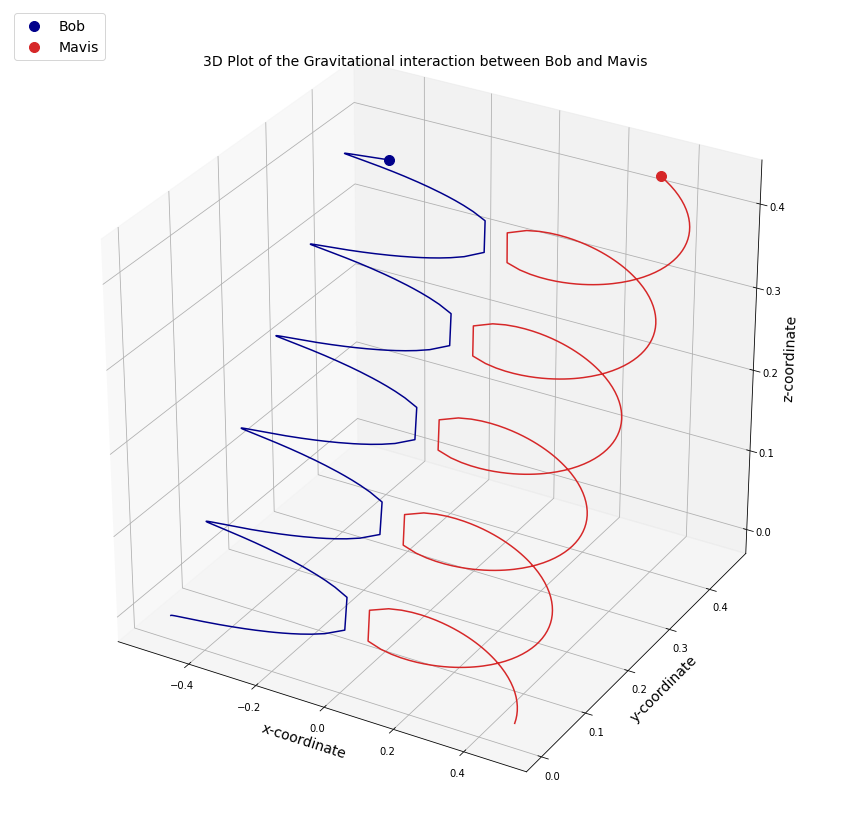


Reminder: The dot is the final position
SIMULATION COMPLETE: All Done:)


In [13]:
def two_body_sim(bod1, bod2, time, steps, G=1, rscale=1, vscale=1):
    
    
    # Get initials from bodies:
    
    r1 = bod1.r.l
    r2 = bod2.r.l
    
    v1 = bod1.v.l
    v2 = bod2.v.l
    
    m1 = bod1.m
    m2 = bod2.m

    init_params=np.array([r1,r2,v1,v2]) # create array of initial parameters
    init_params=init_params.flatten() # turn this into a 1D array
    time_span=np.linspace(0,time,steps) #User get's to decide time and steps
    
    #############################################################
    # Actual Solving

    
    two_body_sol=odeint(eqn_2,init_params,time_span,args=(m1,m2, G, rscale, vscale)) #Solve!


    r1_sol=two_body_sol[:,:3] # Store both trajectories
    r2_sol=two_body_sol[:,3:6]

    ################################################################
    # Plotting
    
    fig=plt.figure(figsize=(15,15)) # Create figure for plotting
    
    ax=fig.add_subplot(111,projection="3d") # Create 3D subplots, so we can put it all on 1 plot
    
    ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue") #Plot the orbits as lines
    ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
    
    ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label=bod1.n) # Plot the final positions of the Bodies
    ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label=bod2.n) # as dots
    
    ax.set_xlabel("x-coordinate",fontsize=14) # Add our labels, legends, and titles
    ax.set_ylabel("y-coordinate",fontsize=14)
    ax.set_zlabel("z-coordinate",fontsize=14)
    ax.set_title(f"3D Plot of the Gravitational interaction between {bod1.n} and {bod2.n}",fontsize=14)
    ax.legend(loc="upper left",fontsize=14)
    plt.show()
    print("\nReminder: The dot is the final position\nSIMULATION COMPLETE: All Done:)")





#Example!

Bob = Body("Bob", 1.1, vector(-.5,0,0), vector(-0.01,0.01,0))
Mavis = Body("Mavis", 1.1, vector(.5, 0,0), vector(0, 0.1, 0.1))

two_body_sim(Bob, Mavis, 8, 500)

# The 3 Body Problem:
Now that we've shown that we can simulate the 2 body problem, we can move on and introduce another body. Now, by doing this we're increasing the number of equations that we need to look at and we are introducing a new coupling. Instead of each body's acceleration depending on their respective distance from the other body, the equations depend on 2 distances, the relative distnace that a body is from each other one. These 2 added complexities make the scaling from 3 body to N body gravity fairly difficult, though the same methods will apply. Each body will feel Up to N-1 forces, and those will determine the trajectories, just the odeint code gets more and more complex. 

In this phase, we will just scale up the earlier code to handle 3 bodies. I will still be using my body, and vector classes as the infrastructure on the user's end, and still rely on numpy arrays for the odeint infrastructure. 

##### eqn_3:
This is the equation I'll put into Odeint to solve for the trajectories. Follows the same procedure as eqn_2, but with the 3rd body and extra gravity terms for each. The nice part of using a functional approach is the ease in adding bodies.

In [7]:
def eqn_3(i, t, m1, m2, m3, G=1,  K1=1, K2=1):
    
    r1 =  vector(i[0], i[1], i[2]) # Establish vectors from input
    r2 = vector(i[3], i[4], i[5])
    r3 = vector(i[6], i[7], i[8])
   
    v1 = vector(i[9], i[10], i[11])
    v2 = vector(i[12], i[13], i[14])
    v3 = vector(i[15], i[16], i[17])

    
    bod1 = _body(m1, r1, v1) #make bodies
    bod2 = _body(m2, r2, v2)
    bod3 = _body(m3, r3, v3)
    
    bod1.a = grav(bod1, bod2, G).div(bod1.m) + grav(bod1, bod3, G).div(bod1.m)#use grav function a = F/m
    bod2.a = grav(bod2, bod1, G).div(bod2.m) + grav(bod2, bod3, G).div(bod2.m)
    bod3.a = grav(bod3, bod1, G).div(bod3.m) + grav(bod3, bod2, G).div(bod3.m)
     
    r_ders = [bod1.v.x, bod1.v.y, bod1.v.z, 
              bod2.v.x, bod2.v.y,bod2.v.z, 
              bod3.v.x, bod3.v.y, bod3.v.z] # get derivatives in each cartesian direction
    
    v_ders = [bod1.a.x, bod1.a.y, bod1.a.z,
              bod2.a.x, bod2.a.y, bod2.a.z,
              bod3.a.x, bod3.a.y, bod3.a.z]
    
    r = [K2*i for i in r_ders] # Introduce Scaling if needed
    v = [K1*i for i in v_ders]
    return  r + v

##### Three Body Sim:
Here's the full simulation, including plotting. Like eqn_3, it's just an adjusted version of the 2 body one. 
The user can supply 3 bodies and a time scale. The user can also scale the distances and velocities if they like, to get a cleaner picture in some situations.

In [12]:
def three_body_sim(bod1, bod2, bod3, time, steps, rscale=1, vscale=1):
    
    # Get initials from bodies:
    
    r1 = bod1.r.l
    r2 = bod2.r.l
    r3 = bod3.r.l
    
    v1 = bod1.v.l
    v2 = bod2.v.l
    v3 = bod3.v.l
    
    m1 = bod1.m
    m2 = bod2.m
    m3 = bod3.m

    init_params=np.array([r1,r2, r3, v1,v2, v3]) # create array of initial parameters
    init_params=init_params.flatten() # turn this into a 1D array
    time_span=np.linspace(0,time,steps) #User get's to decide time and steps
    
    G = 1
    
    #############################################################
    # Actual Solving

    
    three_body_sol=odeint(eqn_3,init_params,time_span,args=(m1,m2,m3,G, rscale, vscale) ) #Solve!


    r1_sol = three_body_sol[:,:3] # Store both trajectories
    r2_sol = three_body_sol[:,3:6]
    r3_sol = three_body_sol[:,6:9]

    ################################################################
    # Plotting
    
    fig=plt.figure(figsize=(15,15)) # Create figure for plotting
    
    ax=fig.add_subplot(111,projection="3d") # Create 3D subplots, so we can put it all on 1 plot
    
    ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue") #Plot the orbits as lines
    ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
    ax.plot(r3_sol[:,0], r3_sol[:,1], r3_sol[:, 2], color = 'purple')
    
    ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label=bod1.n) # Plot the final positions of the Bodies
    ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label=bod2.n) # as dots
    ax.scatter(r3_sol[-1,0], r3_sol[-1, 1], r3_sol[-1,2], color= 'purple', marker = 'o', s=100, label = bod3.n)
    
    ax.set_xlabel("x-coordinate",fontsize=14) # Add our labels, legends, and titles
    ax.set_ylabel("y-coordinate",fontsize=14)
    ax.set_zlabel("z-coordinate",fontsize=14)
    ax.set_title(f"3D Plot of the Gravitational interaction between {bod1.n}, {bod2.n}, and {bod3.n}",fontsize=14)
    ax.legend(loc="upper left",fontsize=14)
    plt.show()
    print("\nReminder: The dot is the final position\nSIMULATION COMPLETE: All Done:)")
    return r1_sol, r2_sol, r3_sol



##### A 3 Body Example:  

Here's a quick example of 3 body motion. Starting at 3 different points with 3 different velocities, here's the simulation in action:



(Note) Be careful though, if the system collapses to a singularity, the odeint solution gets wonky.

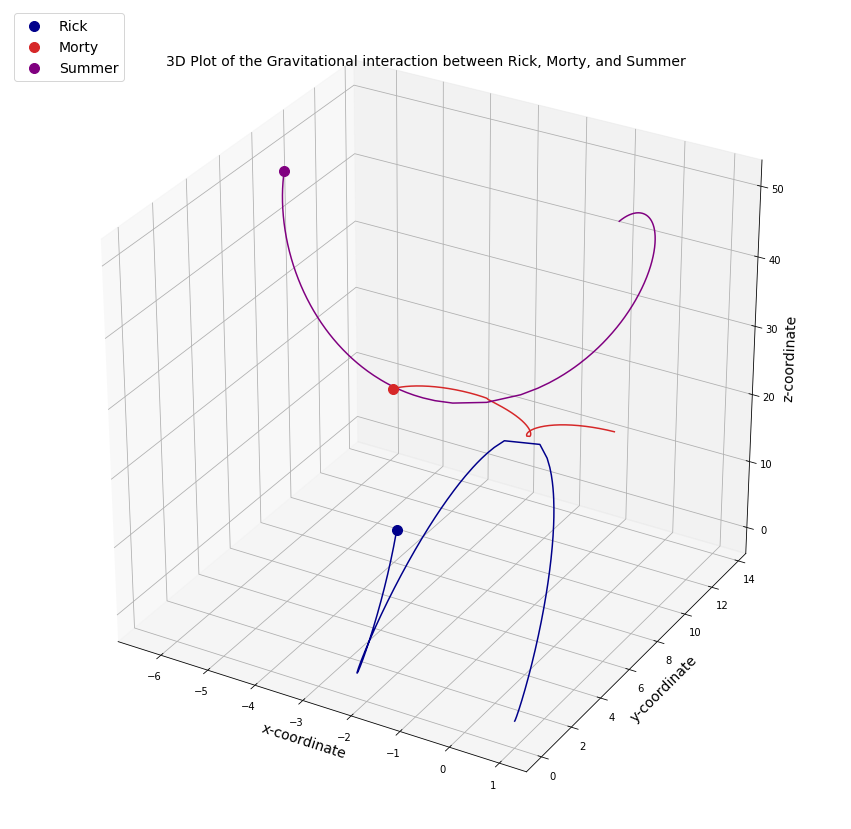


Reminder: The dot is the final position
SIMULATION COMPLETE: All Done:)


In [14]:
#example!

Rick = Body('Rick', 100, vector(1,0,0), vector(0.01,0.01,0))
Morty = Body('Morty', 1000, vector(0,10,20), vector(-0.5, 0, -0.1))
Summer = Body('Summer', 10, vector(0,10,50), vector(0, 1, 0))

sols = three_body_sim(Rick, Morty, Summer, 10, 500)

    

### Conclusion:

In this simulation, we looked at 2 and 3 body gravitational motion. The 2 body case follows what we have been learning about this quarter and in intro physics. As we saw, it was relatively easy to set up and code using scipy's odeint function to solve for our trajectories, and the results were what we expected.

When we moved up to 3 bodies, we can see from the example that the motion starts to enter the chaotic regime. The code became messier, but was no more complicated than the 2 body case, which was surprising to me. I think that generalizing this to the N-Body system would only involve using more lists and for loops to do what is happening in three_body_sim generally. 

However, when running this program, you might notice a clear difference in runtime between the 2 and 3 body cases. That occurs becuase the number of equations and coupling increase dramaticaly with each new body, showing how much more complicated the math gets with just an extra body. This goes to show that amazingly the 2 body problem can be done analytically in general, but the physics get exponentially more interesting when you move to the 3 body case.

Overall, this was a good introduction to chaotic motion, and an opportunity to see how little it can differ from predictable motion in the setup, but quickly devolve. This project has also given me a chance to pracitice with the odeint function, which can be really helpful when solving nasty differential equations. 

Lastly, in my project proposal I did mention wanting to animate the problem. I tried doing so with matplotlib's animation library, but I could not get it to work after a lot fo tries. From what I found, it seems like Mac's OSx does not work well with matplotlibs' FunctionAnimate, which is the best way to animate this kind of line plot. The weird part was that I could get the program to save 100 frames to my desktop, but I couldn't get the Movie Writer to work. As far as possible next steps for this project, I would invest more time into getting the animation to work, and I would generalize my simulation to N-Bodies. I think the second would be a fairly straightforward adaptation, replacing the initial bodies, with a list of all the bodies you want to observe and then retool each part of the simulation to run through more lists with for loops, until each body's 6 equations were done. However, this may take forever to run. 





# Citations:

2 Body example: https://evgenii.com/blog/two-body-problem-simulator/

**2 and 3 Body Example: https://towardsdatascience.com/modelling-the-three-body-problem-in-classical-mechanics-using-python-9dc270ad7767 : Most important source for my code

ODEINT Example/Documentation:
https://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ODE_Example.html

Numpy Documentation:
https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html

Matplotlib Documentation:
https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html  3D Plotting Doc.
https://matplotlib.org/3.3.4/gallery/animation/simple_anim.html Animation Doc.

Scipy Documentation:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
